## **DSTEP20 // Dept of Sanitation in NYC: trends and periodicity**
<small> January 22, 2020 </small>

This notebook will explore two questions related to waste removal by New York City's Department of Sanitation:

- What is the relationship between refuse and recycling?

- Is there periodicity in the tonnage data?

The data can be found [here](https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5).

---

### Time Series Data in Python

First, let's read in the data using the parse_dates keyword.

In [0]:
# -- import pandas and numpy
import numpy as np
import pandas as pd

In [0]:
# -- set the filename and read the data while parsing the MONTH column
fname = "https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
dsny  = pd.read_csv(fname, parse_dates=["MONTH"])

Notice the data type of the "MONTH" column:

In [3]:
# -- show dtypes for the dataframe
dsny.dtypes

MONTH                  datetime64[ns]
BOROUGH                        object
COMMUNITYDISTRICT               int64
REFUSETONSCOLLECTED           float64
PAPERTONSCOLLECTED            float64
MGPTONSCOLLECTED              float64
RESORGANICSTONS               float64
SCHOOLORGANICTONS             float64
LEAVESORGANICTONS             float64
XMASTREETONS                  float64
BOROUGH_ID                      int64
dtype: object

To figure out how this data is sorted, we can print it as usual:

In [4]:
# -- "print" the dsny data without using the print command
dsny

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993-11-01,Manhattan,1,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1
1,1995-09-01,Manhattan,1,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1
2,1995-08-01,Manhattan,1,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1
3,2012-03-01,Manhattan,1,1194.4,341.6,210.8,NaN,NaN,NaN,NaN,1
4,1992-03-01,Manhattan,1,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
20571,1992-01-01,Bronx,6,2165.9,NaN,NaN,NaN,NaN,NaN,NaN,2
20572,1991-04-01,Bronx,6,2240.2,NaN,NaN,NaN,NaN,NaN,NaN,2
20573,1993-09-01,Bronx,6,1954.7,NaN,NaN,NaN,NaN,NaN,NaN,2
20574,1992-09-01,Bronx,6,2107.1,NaN,NaN,NaN,NaN,NaN,NaN,2


We want to focus on only the tons of refuse and recycling data, so let's select only the first 6 columns:

In [0]:
# -- sub-select only the first six columns
cols = dsny.columns[:6]
print(cols)
print("")

dsny = dsny[cols]
print(dsny)

In [6]:
dsny

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED
0,1993-11-01,Manhattan,1,625.2,119.4,34.4
1,1995-09-01,Manhattan,1,633.1,117.2,45.8
2,1995-08-01,Manhattan,1,627.5,82.4,35.6
3,2012-03-01,Manhattan,1,1194.4,341.6,210.8
4,1992-03-01,Manhattan,1,726.0,NaN,NaN
...,...,...,...,...,...,...
20571,1992-01-01,Bronx,6,2165.9,NaN,NaN
20572,1991-04-01,Bronx,6,2240.2,NaN,NaN
20573,1993-09-01,Bronx,6,1954.7,NaN,NaN
20574,1992-09-01,Bronx,6,2107.1,NaN,NaN


In [7]:
# -- rename the columns for ease of use
dsny.columns = ["month", "borough", "district", "refuse", "paper", "mgp"]

dsny

,month,borough,district,refuse,paper,mgp
0,1993-11-01,Manhattan,1,625.2,119.4,34.4
1,1995-09-01,Manhattan,1,633.1,117.2,45.8
2,1995-08-01,Manhattan,1,627.5,82.4,35.6
3,2012-03-01,Manhattan,1,1194.4,341.6,210.8
4,1992-03-01,Manhattan,1,726.0,NaN,NaN
...,...,...,...,...,...,...
20571,1992-01-01,Bronx,6,2165.9,NaN,NaN
20572,1991-04-01,Bronx,6,2240.2,NaN,NaN
20573,1993-09-01,Bronx,6,1954.7,NaN,NaN
20574,1992-09-01,Bronx,6,2107.1,NaN,NaN


Before diving into the individual boroughs, we can use our groupby method that we explored last week to get the total refuse for NYC by month:

In [8]:
# -- groupby month and sum
nyc_ts = dsny.groupby("month").sum()

nyc_ts

,district,refuse,paper,mgp
month,,,,
1990-01-01,17,71.9,0.0,0.0
1990-06-01,6,11518.0,0.0,0.0
1990-07-01,6,15243.8,0.0,0.0
1990-08-01,49,31162.8,0.0,0.0
1990-09-01,49,34097.0,0.0,0.0
...,...,...,...,...
2019-09-01,438,205838.0,23594.1,23667.9
2019-10-01,438,218225.1,25714.7,25983.0
2019-11-01,438,202763.3,23241.6,23199.2


Text(0, 0.5, 'total NYC refuse [tons]')

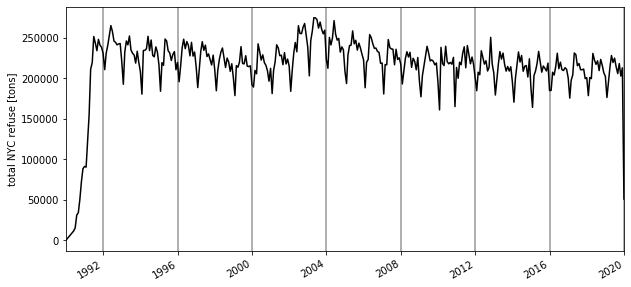

In [9]:
# -- plot it and add some vertical grid lines
ax = nyc_ts.plot(y="refuse", color="k", legend=False, use_index=True, figsize=(10,5))
ax.grid(axis="x", which="major", lw=2)
ax.set_xlabel("")
ax.set_ylabel("total NYC refuse [tons]")

Interestingly, it looks like there is some data incompleteness in the early 90s.  Let's restrict our study period to 1995 to 2019.  Datetime objects let us work with this limits fairly easily:

In [10]:
# -- let's concentrate on 1995 to 2019 (16 years)                               
ind_tlo = dsny["month"] >= "1995-01-01"
ind_thi = dsny["month"] < "2019-01-01"
ind_tot = ind_tlo & ind_thi

dsny = dsny[ind_tot]

print(dsny)

           month    borough  district  refuse  paper    mgp
1     1995-09-01  Manhattan         1   633.1  117.2   45.8
2     1995-08-01  Manhattan         1   627.5   82.4   35.6
3     2012-03-01  Manhattan         1  1194.4  341.6  210.8
6     2002-01-01   Brooklyn         7  3191.7   10.5  568.8
7     2008-01-01   Brooklyn         7  3289.8  548.0  404.1
...          ...        ...       ...     ...    ...    ...
20565 2000-03-01      Bronx         6  2047.6   85.1  167.8
20566 2017-07-01      Bronx         6  2143.5  118.8  177.1
20568 2003-05-01      Bronx         6  2588.2   81.5    NaN
20569 2003-10-01      Bronx         6  2486.7   85.5    NaN
20570 2002-11-01      Bronx         6  2463.8   69.3    NaN

[16992 rows x 6 columns]


Notice there are some NaNs.  Let's **<u>assume</u>** that those are 0s.  But note this is a **choice**!

In [11]:
# -- convert NaNs to 0s
dsny = dsny.fillna(0.0)

print(dsny)

           month    borough  district  refuse  paper    mgp
1     1995-09-01  Manhattan         1   633.1  117.2   45.8
2     1995-08-01  Manhattan         1   627.5   82.4   35.6
3     2012-03-01  Manhattan         1  1194.4  341.6  210.8
6     2002-01-01   Brooklyn         7  3191.7   10.5  568.8
7     2008-01-01   Brooklyn         7  3289.8  548.0  404.1
...          ...        ...       ...     ...    ...    ...
20565 2000-03-01      Bronx         6  2047.6   85.1  167.8
20566 2017-07-01      Bronx         6  2143.5  118.8  177.1
20568 2003-05-01      Bronx         6  2588.2   81.5    0.0
20569 2003-10-01      Bronx         6  2486.7   85.5    0.0
20570 2002-11-01      Bronx         6  2463.8   69.3    0.0

[16992 rows x 6 columns]


Let's replot total refuse over the whole city as well as recycling:

Text(0, 0.5, 'total NYC collected tonnage')

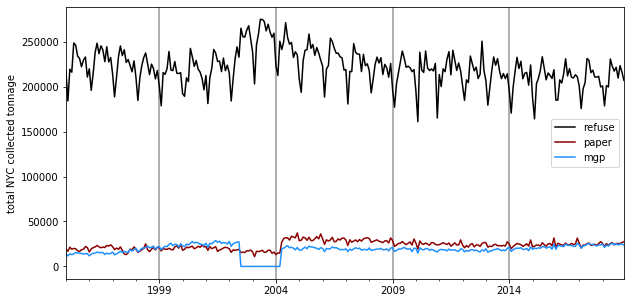

In [12]:
# -- groupby month and sum
nyc_ts = dsny.groupby("month").sum()

# -- plot it and add some vertical grid lines
ax = nyc_ts.plot(y=["refuse", "paper", "mgp"], color=["k", "darkred", "dodgerblue"], use_index=True, figsize=(10,5))
ax.grid(axis="x", which="major", lw=2)
ax.set_xlabel("")
ax.set_ylabel("total NYC collected tonnage")

We can also do some more advanced gymnastics to compare boroughs:

In [13]:
# -- groupby borough and month
boro_ts = dsny.groupby(["borough", "month"]).sum()

print(boro_ts)

                          district   refuse   paper     mgp
borough       month                                        
Bronx         1995-01-01        78  35950.9  1843.4  1691.3
              1995-02-01        78  32534.1  1588.9  1489.1
              1995-03-01        78  35877.8  2059.9  1833.0
              1995-04-01        78  34192.7  1967.0  1659.0
              1995-05-01        78  39393.6  1992.9  1733.0
...                            ...      ...     ...     ...
Staten Island 2018-08-01         6  16279.1  2013.8  1985.0
              2018-09-01         6  14865.8  1931.9  1864.4
              2018-10-01         6  15848.1  1962.5  1895.5
              2018-11-01         6  15067.7  2125.1  1890.1
              2018-12-01         6  14595.9  2260.4  1792.0

[1440 rows x 4 columns]


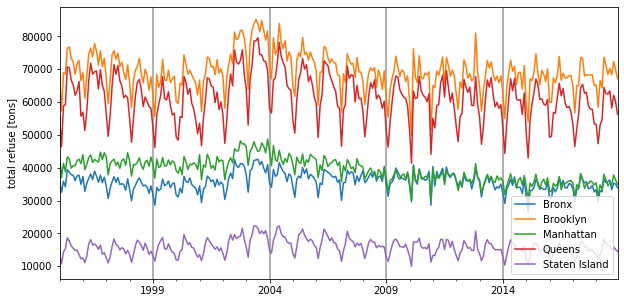

In [14]:
# -- plot each borough's refuse by unstacking
ax = boro_ts.unstack("borough").plot(y="refuse", figsize=[10, 5])
ax.grid(axis="x", which="major", lw=2)
ax.set_xlabel("")
ax.set_ylabel("total refuse [tons]")
ax.legend(loc="lower right")

### Filtering Time Series Data

We see that there is a lot of variability in the time series data **"on multiple time scales"**.  We can isolate the short time scale behavior by removing trends.  Let's concentrate on Brooklyn for now:

In [15]:
# -- sub-select Brooklyn
bk    = dsny[dsny["borough"] == "Brooklyn"]
bk["recy"] = bk["paper"] + bk["mgp"]
bk_ts = bk.groupby("month").sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


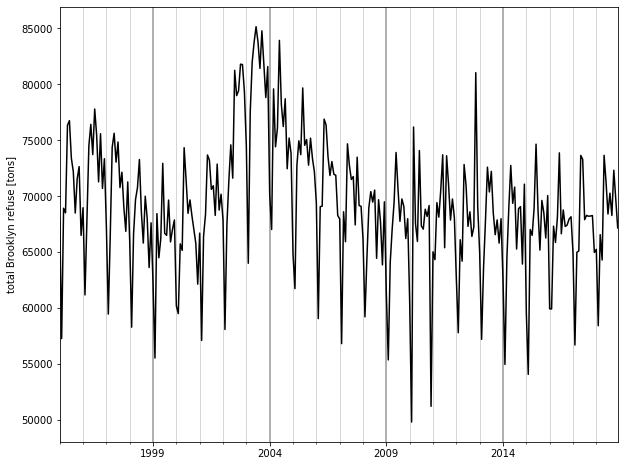

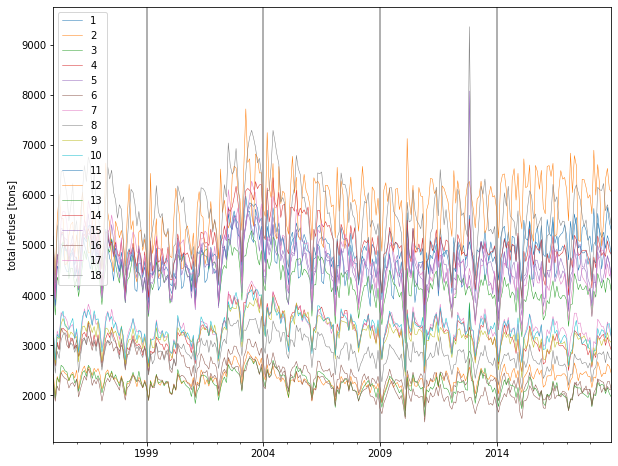

In [16]:
# -- plot total refuse and refuse of individual districts
ax = bk_ts.plot(y="refuse", legend=False, color="k", figsize=[10, 8])
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("total Brooklyn refuse [tons]")

bkdist = bk.groupby(["district", "month"]).sum()
ax = bkdist.unstack("district").plot(y="refuse", lw=0.5, figsize=[10, 8])
ax.grid(axis="x", which="major", lw=2)
ax.set_xlabel("")
ax.set_ylabel("total refuse [tons]")
ax.legend(loc="upper left")

Long time scale trends can be found by "filtering" time series data.  One of the most common is the rolling mean:

In [0]:
# -- take the rolling mean of the Brooklyn refuse with a quarterly window
bk_ts_03 = bk_ts.rolling(3).mean()
bk_ts_12 = bk_ts.rolling(12).mean()

Text(0, 0.5, 'total Brooklyn refuse [tons]')

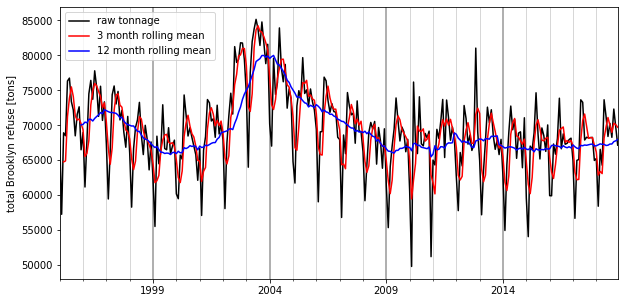

In [18]:
# -- plot the two
ax = bk_ts.plot(y="refuse", label="raw tonnage", color="k", figsize=[10, 5])
bk_ts_03.plot(y="refuse", label="3 month rolling mean", color="red", ax=ax)
bk_ts_12.plot(y="refuse", label="12 month rolling mean", color="blue", ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("total Brooklyn refuse [tons]")

So the 12 month rolling mean is showing is giving us the long time scale behavior.  What if we compare the smoothed refuse to recycling?:

Text(0, 0.5, 'total Brooklyn tonnage')

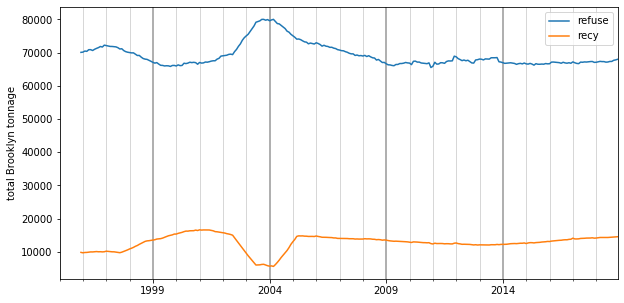

In [19]:
# -- plot refuse and recycling
ax = bk_ts_12.plot(y=["refuse", "recy"], figsize=[10,5])
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("total Brooklyn tonnage")

### Covariance and correlation

The above plot is interesting for a few reasons...  Let's try to calcuate the correlation coefficient between the two:

# **$C = \frac{cov(v_1, \ v_2)}{\sigma_{v_1} \sigma_{v_2}}$**

## **$cov(v_1, \ v_2) = \sum_i \frac{(v_{1, i} \ - \  \bar{v}_1) \ (v_{2, i} \ - \  \bar{v}_2)}{\sqrt{N- 1}} $**

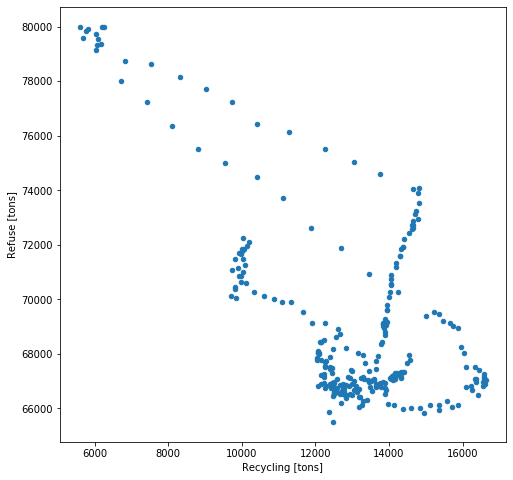

In [20]:
# -- make a scatter plot of the tonnage values
ax = bk_ts_12.plot.scatter("recy", "refuse", figsize=[8, 8])
xl = ax.set_xlabel("Recycling [tons]")
yl = ax.set_ylabel("Refuse [tons]")

The correlation coefficient defined as above ranges from 1 (perfectly correlated) to -1 (perfectly anti-correlated).

In [21]:
# -- calculate Pearson correlation coefficient
bk_ts_12.corr()

,district,refuse,paper,mgp,recy
district,NaN,NaN,NaN,NaN,NaN
refuse,NaN,1.000000,-0.402691,-0.753027,-0.678826
paper,NaN,-0.402691,1.000000,0.685559,0.862553
mgp,NaN,-0.753027,0.685559,1.000000,0.959684
recy,NaN,-0.678826,0.862553,0.959684,1.000000


#### **ANSWER TO FIRST QUESTION: Refuse and Recycling are <i>anti</i>-correlated <small>(in Brooklyn)</small>.**

### Auto-Correlation: Determining Periodicity

We can remove the smoothed time series from the raw data to isolate the short time scale (aka "high frequency") behavior:

In [0]:
# -- isolate short time scale behavior
bk_short = bk_ts - bk_ts_12

In [24]:
bk_short

,district,refuse,paper,mgp,recy
month,,,,,
1995-01-01,NaN,NaN,NaN,NaN,NaN
1995-02-01,NaN,NaN,NaN,NaN,NaN
1995-03-01,NaN,NaN,NaN,NaN,NaN
1995-04-01,NaN,NaN,NaN,NaN,NaN
1995-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-08-01,0.0,2957.525000,66.541667,307.666667,374.208333
2018-09-01,0.0,954.041667,220.283333,-9.500000,210.783333
2018-10-01,0.0,4657.583333,135.441667,263.150000,398.591667


Text(0, 0.5, 'residual Brookyln refuse [tons]')

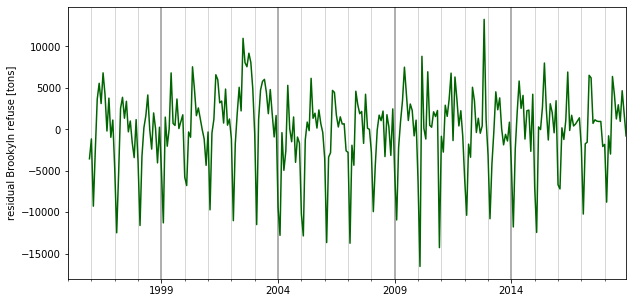

In [23]:
# -- plot the the short time scale (high frequency) behavior
ax = bk_short.plot(y="refuse", legend=False, color="darkgreen", figsize=[10, 5])
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("residual Brookyln refuse [tons]")

There does *seem* to be some periodicity in this time series.  We can extract that periodicity by extending the concept of correlation to <u>auto-correlation</u> which is the correlation of a time series with itself **shifted by some time lag**.

(0, 24)

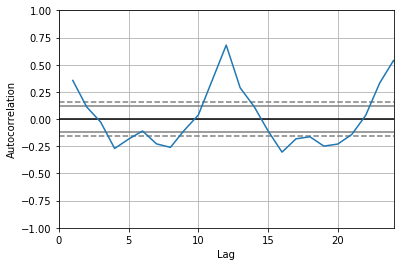

In [28]:
# -- plot autocorrelation function
ax = pd.plotting.autocorrelation_plot(bk_short["refuse"].dropna())
ax.set_xlim(0, 24)

In [26]:
for ii in np.arange(60):
  cc = bk_short["refuse"].autocorr(ii)
  print("lag, C : {0}, {1}".format(ii, cc))

lag, C : 0, 0.9999999999999998
lag, C : 1, 0.35598127080735276
lag, C : 2, 0.11128239042301666
lag, C : 3, -0.02789069444175028
lag, C : 4, -0.27329693635375013
lag, C : 5, -0.18655153626872667
lag, C : 6, -0.11126221592814373
lag, C : 7, -0.2319245479658344
lag, C : 8, -0.26672527306507005
lag, C : 9, -0.10480500953744412
lag, C : 10, 0.038021189387769674
lag, C : 11, 0.3724059055427355
lag, C : 12, 0.7041004582372236
lag, C : 13, 0.2976787899020472
lag, C : 14, 0.11907440178783943
lag, C : 15, -0.11434391181060219
lag, C : 16, -0.32022335794462004
lag, C : 17, -0.19167752004797936
lag, C : 18, -0.1716987342107833
lag, C : 19, -0.26356317661678513
lag, C : 20, -0.24436230318197105
lag, C : 21, -0.15082999783588605
lag, C : 22, 0.03715128236991403
lag, C : 23, 0.356074047499466
lag, C : 24, 0.5816327471900267
lag, C : 25, 0.3016569182165254
lag, C : 26, 0.12207897499947577
lag, C : 27, -0.17454340666626642
lag, C : 28, -0.29809387741821947
lag, C : 29, -0.20939827747911868
lag, C : 30,

#### **ANSWER TO SECOND QUESTION: Refuse has periodicity on annual time scales <small>(in Brooklyn)</small>.**